In [1]:
from sympy import *
init_printing(use_unicode=True)

In [6]:
E,A,l,n = symbols('E A l n')
u_1, u_2, u_3 = symbols('u_1 u_2 u_3')
F, R = symbols('F R')

In [36]:
F_ext = Matrix([[F],[0],[R]])
F_v = (1/4)*n*l*A*Matrix([[1],[2],[1]])
F_g = F_ext+F_v
K=(2*E*A)/l*Matrix([[1,-1,0],[-1,2,-1],[0,-1,1]])
u=Matrix([[u_1],[u_2],[0]])

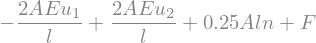

In [37]:
eq = F_ext+F_v - K*u
eq[0]

In [38]:
Kuu=K[0:2,0:2]
Kub=K[0:2,2]
Kbu=K[2,0:2]
Kbb=K[2,2]

'rhs:'

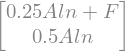

'solution:'

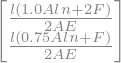

In [58]:
rhs=Matrix(F_g[0:2])-Kub*u[2]
display("rhs:",rhs)
uu = Kuu.LUsolve(rhs)
display("solution:",Kuu.LUsolve(rhs))

In [69]:
Kbu*uu-Matrix([F_v[2]])

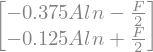

In [75]:
Ke=E*A/l*Matrix([[1,-1],[-1,1]])
Fve=(1/4)*n*l*A*Matrix([[1],[1]])
ue=Matrix([[uu[1]],[uu[0]]])
Ke*ue-Fve

In [102]:
eps=2*E*A/l * Matrix([[1, -1]])
N1=-eps*Matrix([[0],[uu[1]]])
N2=-eps*Matrix([[uu[1]],[uu[0]]])
display("N1",N1)
display("N2",N2)

'N1'

'N2'

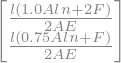

In [101]:
uu

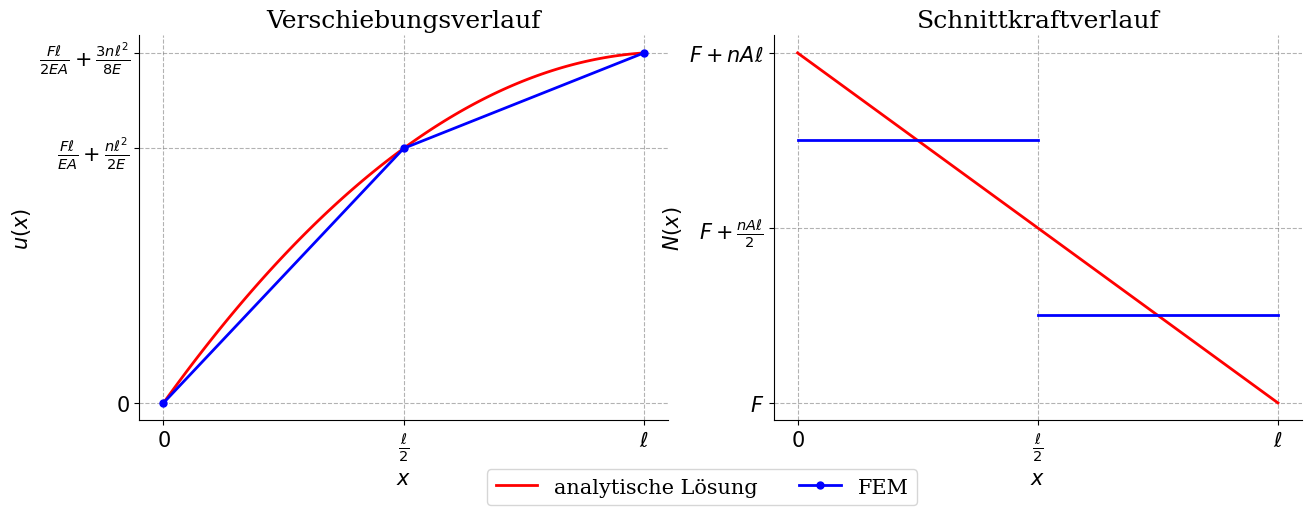

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the plot configurations.
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.color'] = 'black'
plt.rcParams['legend.frameon'] = True
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 15
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.6
plt.rcParams['grid.linestyle'] = '--'

sizex = 7.5
sizey = 5

# Create a figure and axis.
fig, ax = plt.subplots(1, 2,figsize=(2*sizex,sizey))

F=1
E=1
A=1
l=20
n=1

x = np.linspace(0, l, 100)


# Plotting the functions.
ax[0].plot(x, (F/(E*A)+n*l/E)*x-(n/(2*E))*x**2,color='red',linewidth=2.0,label="analytische Lösung")

fem_sol=np.array([
 [0,0],
 [l/2,F*l/(2*E*A)+3*n*l**2/(8*E)],
 [l,F*l/(E*A)+n*l**2 / (2*E)]   
])

#ax[0].scatter(fem_sol[:,0],fem_sol[:,1],color="blue",marker="o",s=100,label="FEM")
ax[0].plot(fem_sol[:,0],fem_sol[:,1],color="blue",marker="o",markersize=5,label="FEM")
# Set labels for the axis
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$u(x)$")
ax[0].set_title("Verschiebungsverlauf")

# Set custom ticks for the x-axis with LaTeX symbols
tick_positions = [0, l/2, l]
tick_labels = [r"$0$", r"$\frac{\ell}{2}$", r"$\ell$"]
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels)
ax[0].set_yticks([0,F*l/(2*E*A)+3*n*l**2/(8*E),F*l/(E*A)+n*l**2 / (2*E)])
ax[0].set_yticklabels([r"$0$",r"$\frac{F\ell}{EA} + \frac{n \ell^2}{2E}$",r"$\frac{F\ell}{2EA} +\frac{3 n \ell^2}{8E}$"])

# Draw background grid
ax[0].grid(True)

# Add a second subplot (you can customize this as needed)
# For demonstration, let's just add a simple plot in the second subplot
fem_sol_N=np.array([F+3/4*n*A*l,F+1/4*n*A*l])
ax[1].plot(x, F+n*A*(l-x), color='red', linewidth=2.0)
ax[1].plot([0,l/2],[fem_sol_N[0],fem_sol_N[0]],color='blue',linewidth=2.0)
ax[1].plot([l/2,l],[fem_sol_N[1],fem_sol_N[1]],color='blue',linewidth=2.0)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$N(x)$")
ax[1].set_title("Schnittkraftverlauf")
ax[1].grid(True)
ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels)

ax[1].set_yticks([1,F+n*l/2*A,F+n*l])
ax[1].set_yticklabels([r"$F$",r"$F+\frac{nA\ell}{2}$",r"$F+nA\ell$"])

# Create a common legend below both subplots
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=2)

# Adjust layout to make room for the legend
#plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the rect to make space for the legend

# Show the plot
plt.show()

# Add legend.
# ax[0].legend([r"analytische Lösung", r"FEM"])

In [133]:
---
mystnb:
  image:
    width: 100
  figure:
    caption: |
      Vergleich der analytischen Lösung mit der FE-Lösung.
    name: FE-compare
---
import numpy as np
import matplotlib.pyplot as plt

# Set up the plot configurations.
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.color'] = 'black'
plt.rcParams['legend.frameon'] = True
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 15
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.6
plt.rcParams['grid.linestyle'] = '--'

sizex = 7.5
sizey = 5

# Create a figure and axis.
fig, ax = plt.subplots(1, 2,figsize=(2*sizex,sizey))

F=1
E=1
A=1
l=20
n=1

x = np.linspace(0, l, 100)


# Plotting the functions.
ax[0].plot(x, (F/(E*A)+n*l/E)*x-(n/(2*E))*x**2,color='red',linewidth=2.0,label="analytische Lösung")

fem_sol=np.array([
 [0,0],
 [l/2,F*l/(2*E*A)+3*n*l**2/(8*E)],
 [l,F*l/(E*A)+n*l**2 / (2*E)]   
])

#ax[0].scatter(fem_sol[:,0],fem_sol[:,1],color="blue",marker="o",s=100,label="FEM")
ax[0].plot(fem_sol[:,0],fem_sol[:,1],color="blue",marker="o",markersize=5,label="FEM")
# Set labels for the axis
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$u(x)$")
ax[0].set_title("Verschiebungsverlauf")

# Set custom ticks for the x-axis with LaTeX symbols
tick_positions = [0, l/2, l]
tick_labels = [r"$0$", r"$\frac{\ell}{2}$", r"$\ell$"]
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels)
ax[0].set_yticks([0,F*l/(2*E*A)+3*n*l**2/(8*E),F*l/(E*A)+n*l**2 / (2*E)])
ax[0].set_yticklabels([r"$0$",r"$\frac{F\ell}{EA} + \frac{n \ell^2}{2E}$",r"$\frac{F\ell}{2EA} +\frac{3 n \ell^2}{8E}$"])

# Draw background grid
ax[0].grid(True)

# Add a second subplot (you can customize this as needed)
# For demonstration, let's just add a simple plot in the second subplot
fem_sol_N=np.array([F+3/4*n*A*l,F+1/4*n*A*l])
ax[1].plot(x, F+n*A*(l-x), color='red', linewidth=2.0)
ax[1].plot([0,l/2],[fem_sol_N[0],fem_sol_N[0]],color='blue',linewidth=2.0)
ax[1].plot([l/2,l],[fem_sol_N[1],fem_sol_N[1]],color='blue',linewidth=2.0)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$N(x)$")
ax[1].set_title("Schnittkraftverlauf")
ax[1].grid(True)
ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels)

ax[1].set_yticks([1,F+n*l/2*A,F+n*l])
ax[1].set_yticklabels([r"$F$",r"$F+\frac{nA\ell}{2}$",r"$F+nA\ell$"])

# Create a common legend below both subplots
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=2)

# Adjust layout to make room for the legend
#plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the rect to make space for the legend

# Show the plot
plt.show()

# Add legend.
# ax[0].legend([r"analytische Lösung", r"FEM"])

SyntaxError: invalid syntax (1054829271.py, line 1)